<a href="https://colab.research.google.com/github/Venchislav/Stats-for-DS/blob/main/NetflixPd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
data.dropna(inplace=True)

In [17]:
data.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


<Axes: ylabel='type'>

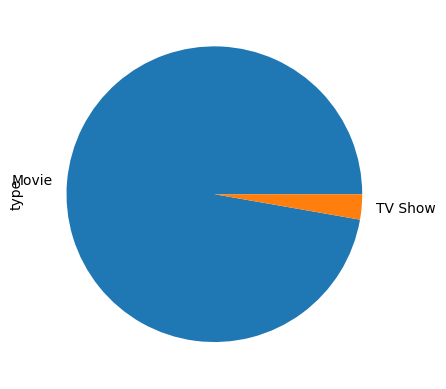

In [27]:
data['type'].value_counts().plot(kind="pie")

In [31]:
data = data[data.apply(lambda x: x['release_year'] > 2000, axis=1)]

<Axes: ylabel='release_year'>

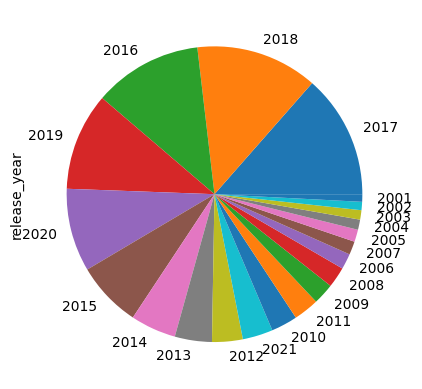

In [32]:
data['release_year'].value_counts().plot(kind="pie")

In [33]:
data.groupby("release_year").agg({"type":"count"})

,type
release_year,
2001,40
2002,44
2003,50
2004,54
2005,65
2006,83
2007,71
2008,110
2009,112


In [35]:
data['country'].value_counts()

United States                   1616
India                            788
United Kingdom                   169
Canada                           106
Spain                             91
                                ... 
Canada, Norway                     1
France, Senegal, Belgium           1
Uruguay, Guatemala                 1
Romania, Bulgaria, Hungary         1
United Arab Emirates, Jordan       1
Name: country, Length: 578, dtype: int64

<Axes: >

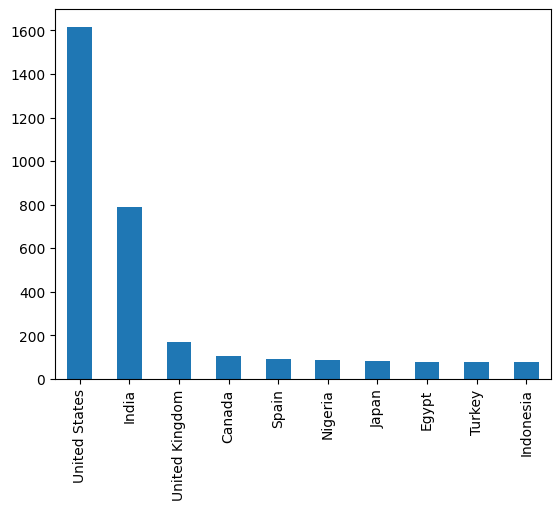

In [37]:
data.country.value_counts()[:10].plot(kind="bar")

In [42]:
data['duration'].value_counts().sort_values(ascending=False)[:20]

97 min      121
94 min      118
95 min      117
93 min      116
90 min      115
91 min      111
92 min      105
102 min     105
1 Season    105
99 min      103
98 min      102
96 min       99
88 min       95
101 min      93
106 min      93
103 min      91
104 min      88
100 min      86
107 min      84
86 min       84
Name: duration, dtype: int64

In [44]:
data['director'].value_counts().sort_values(ascending=False)[:30]

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Don Michael Paul          10
Troy Miller                8
Shannon Hartman            8
Robert Rodriguez           8
Hakan Algül                8
Ryan Polito                8
Martin Scorsese            7
Kunle Afolayan             7
Toshiya Shinohara          7
Yılmaz Erdoğan             7
Lance Bangs                7
Justin G. Dyck             7
Ashutosh Gowariker         6
Robert Vince               6
Fernando Ayllón            6
Steven Spielberg           6
Hanung Bramantyo           6
Ram Gopal Varma            6
Robert Luketic             6
Mae Czarina Cruz           6
Anees Bazmee               6
Ozan Açıktan               6
Sameh Abdulaziz            6
David Dhawan               6
Imtiaz Ali                 6
Name: director, dtype: int64

In [45]:
data['cast'].value_counts().sort_values(ascending=False)[:30]

Samuel West                                                                                                                                                  10
Jeff Dunham                                                                                                                                                   7
Kevin Hart                                                                                                                                                    6
Bill Burr                                                                                                                                                     5
Jim Gaffigan                                                                                                                                                  5
Vir Das                                                                                                                                                       4
Iliza Shlesinger                        

In [46]:
data[data['type'] == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
